In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/DS Data Sets/Neural Networks/gas_turbines.csv')

In [6]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [8]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [12]:
df.shape

(15039, 11)

In [13]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [14]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [15]:
# Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


AT


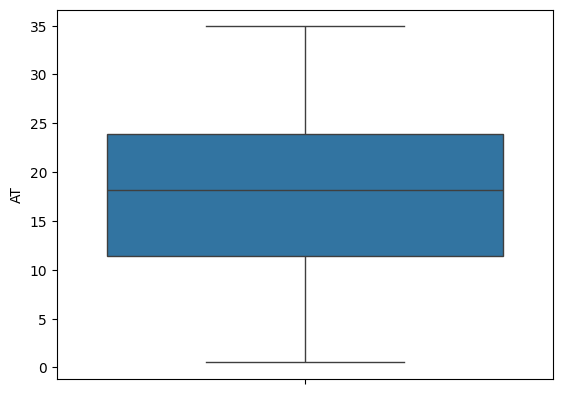

AP


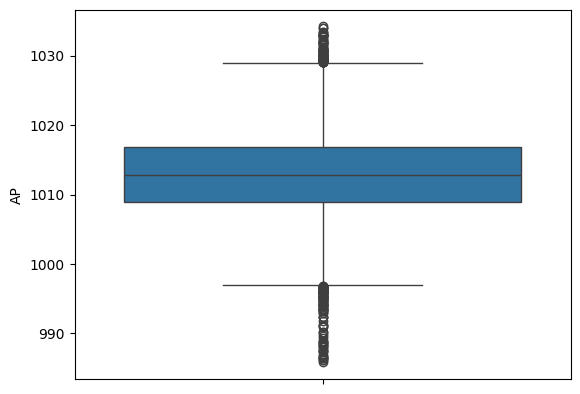

AH


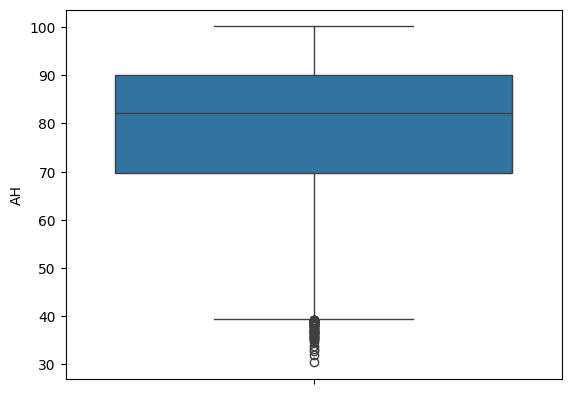

AFDP


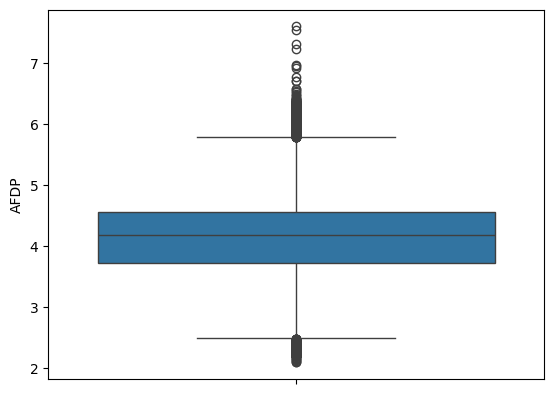

GTEP


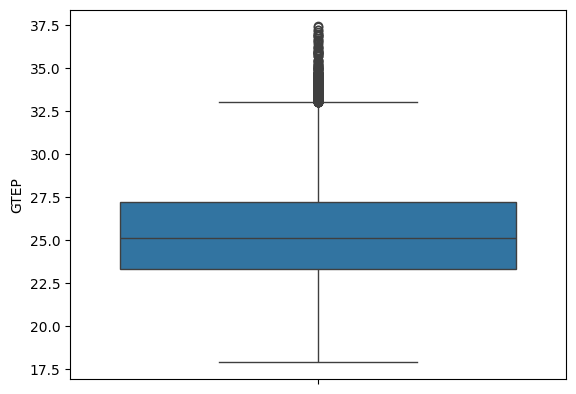

TIT


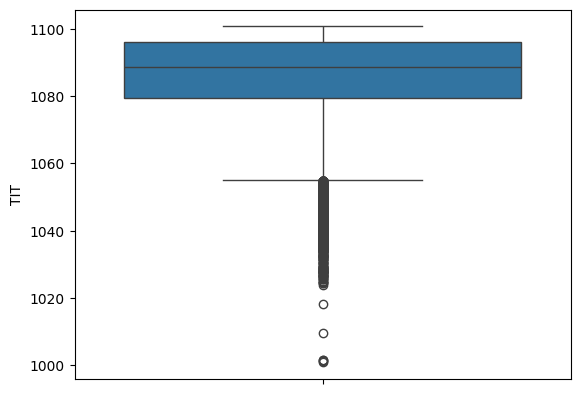

TAT


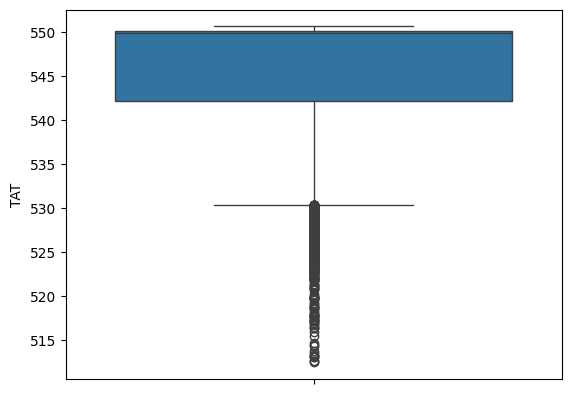

TEY


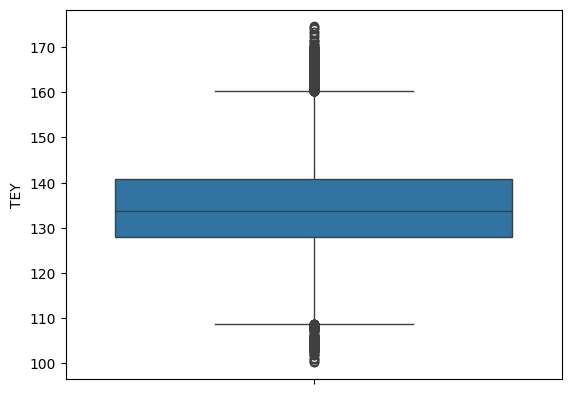

CDP


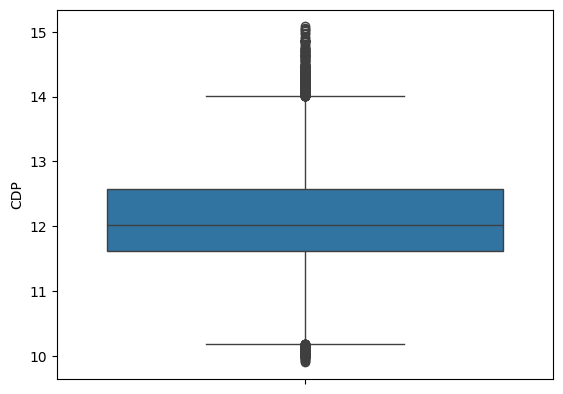

CO


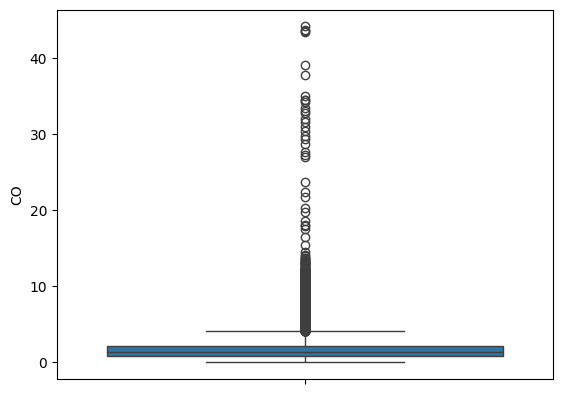

NOX


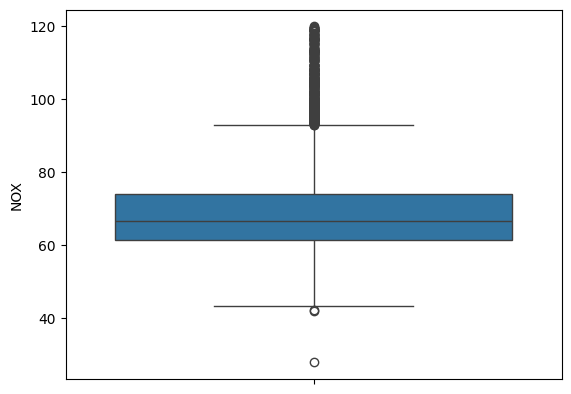

In [17]:
for i in df.columns:
  print(i)
  sns.boxplot(df[i])
  plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7cc28548d6c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7cc28548c370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cc28548f130>],
 'medians': [<matplotlib.lines.Line2D at 0x7cc28548c400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cc28548d270>],
 'means': []}

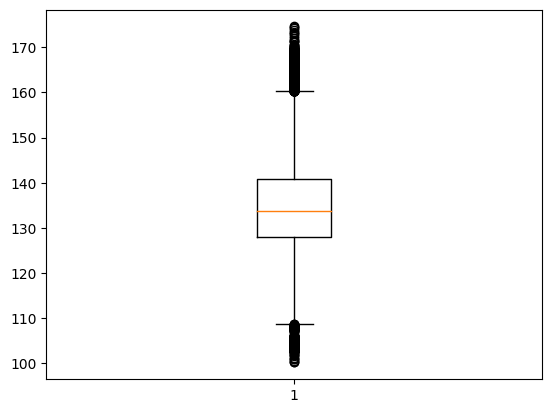

In [18]:
# Boxplot of Turbine Energy Yield
plt.boxplot(df['TEY'])

<Axes: ylabel='TEY'>

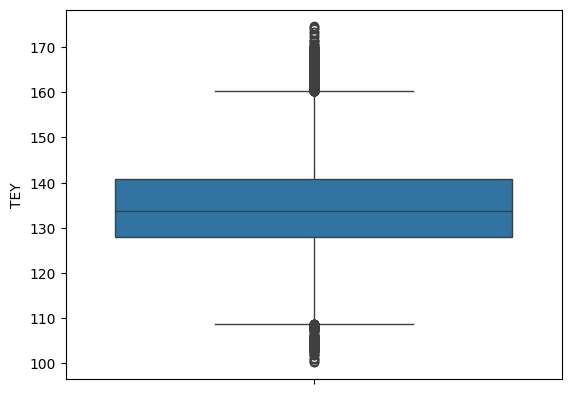

In [19]:
sns.boxplot(df['TEY'])

In [20]:
x=df.loc[:,['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
y=df.loc[:,['TEY']]

In [22]:
# Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler=StandardScaler()

In [24]:
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

In [25]:
def baseline_model():
  model=Sequential()
  model.add(Dense(10,input_dim=10,activation='tanh'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [ ]:
!pip install keras

In [30]:
import keras
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import InputLayer,Dense

In [ ]:
!pip install scikeras

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install tensorflow
import tensorflow as tf

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
# Failed to import KerasRegressor

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [46]:
x=df.drop(columns=['TEY'],axis=1)
y=df.iloc[:,7]

In [47]:
from sklearn.preprocessing import scale
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
x_train_scaled=scale(x_train)
x_test_scaled=scale(x_test)
x_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [49]:
import tensorflow as tf
input_size=len(x.columns)
output_size=1
hidden_layer_size=50

model=tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size,input_dim=input_size,activation='relu'),
                           tf.keras.layers.Dense(output_size)])


In [50]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.03)
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MeanSquaredError'])

In [51]:
num_epochs=100
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)
model.fit(x_train_scaled,y_train,callbacks=early_stopping,validation_split=0.1,epochs=num_epochs,verbose=False)

In [52]:
predictions=model.predict_on_batch(x_test_scaled)

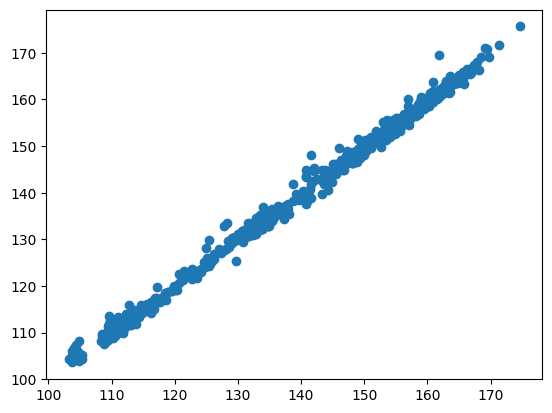

In [53]:
plt.scatter(y_test,predictions)

In [54]:
predictions_df=pd.DataFrame()
predictions_df['Actual']=y_test
predictions_df['Predicted']=predictions
predictions_df['% Error']=abs(predictions_df['Actual']-predictions_df['Predicted'])
predictions_df.reset_index(drop=True)

,Actual,Predicted,% Error
0,134.46,134.459412,0.000588
1,111.88,111.943298,0.063298
2,133.72,134.766647,1.046647
3,133.79,133.585419,0.204581
4,110.77,110.777588,0.007588
...,...,...,...
1499,132.85,132.812317,0.037683
1500,125.07,126.025558,0.955558
1501,160.95,160.981857,0.031857
1502,133.12,133.002945,0.117055
